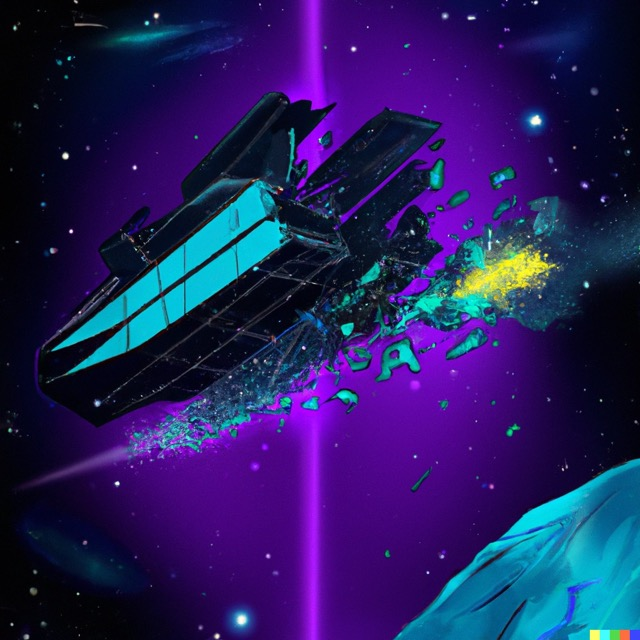

`Bem vindo ao ano de 2912, onde suas habilidades de cientísta de dados são necessárias para resolver um mistério cósmico. Nós recebemos uma transmissão de quatro anos luz de distância e as coisas não parecem boas.`

`A Espaçonave Titanic era uma nave interestelar lançada há um mês. Com quase 13000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando emigrantes de nosso sistema solar para três exoplanetas recém-habitáveis orbitando estrelas próximas.`

`Ao contornar Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a nave espacial Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Inelizmente, ela teve um destino semelhante ao de seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foram transportados para uma dimensão alternativa!`

`Para ajudar as equipes de resgate e recuperar os passageiros perdidos, precisamos da sua ajuda para prever quais passageiros foram transportdos pela anomalia usando registros recuperados do sistema de computador danificado da espaçonave.`

`Ajude a salvá-los e mude a história`

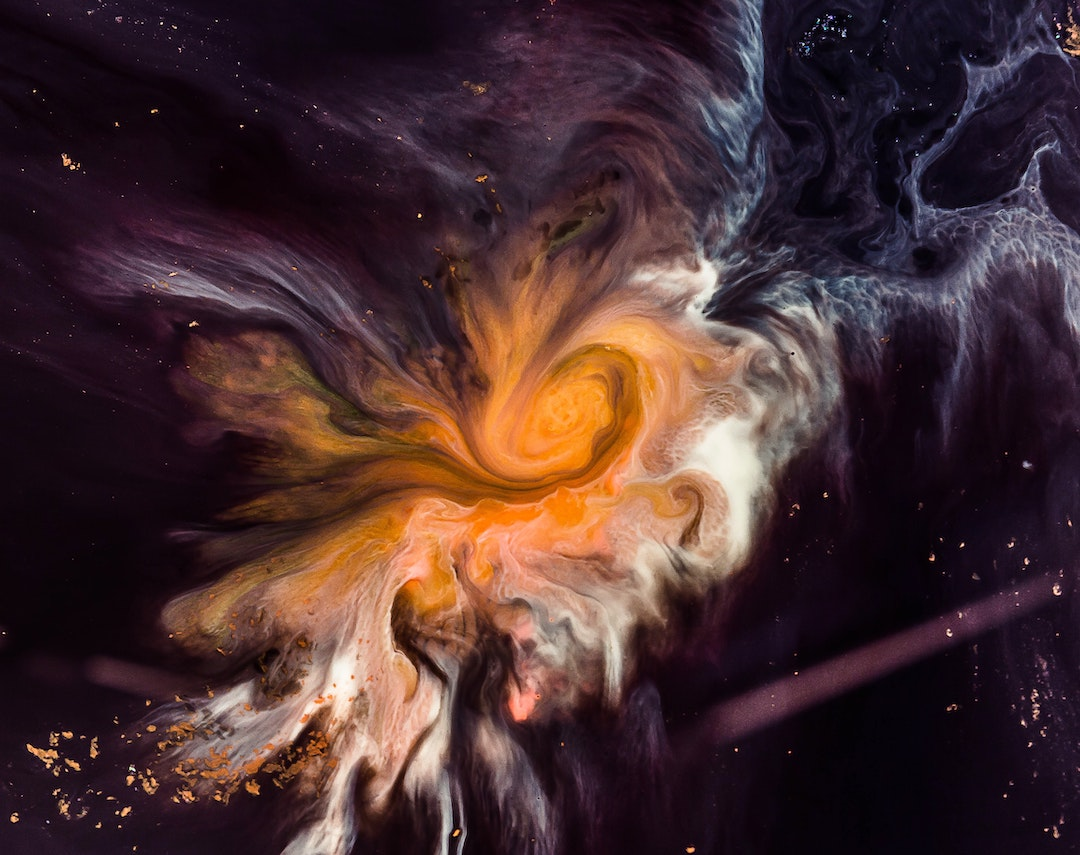



---



---



Sua tarefa é prever se um passageiro foi transportado para uma dimensão alternativa durante a colisão da espaçonave Titanic com a anomalia do espaço-tempo. Para ajudá-lo a fazer essas previsões, você recebe um conjunto de registros pessoais recuperados do sistema de computador danificado do navio.


---



---



- train.csv - Registros pessoais de cerca de dois terços (~8700) dos passageiros, para serem usados como dados de treinamento.
  - **PassengerId**- Um ID exclusivo para cada passageiro. Cada Id assume a forma gggg_pp onde gggg indica um grupo com o qual o passageiro está viajando e pp é seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.
  - **HomePlanet** - O planeta do qual o passageiro partiu, normalmente seu planeta de residência permanente.
  - **CryoSleep** - Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines.
  - **Cabin** - O número da cabine onde o passageiro está hospedado. Assume a forma convés/num/lado, onde o lado pode ser P para bombordo ou S para estibordo.
  - **Destination** - O planeta para o qual o passageiro irá desembarcar.
  - **Age** - A idade do passageiro.
  - **VIP** - Se o passageiro pagou pelo serviço VIP especial durante a viagem.
  - **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Valor cobrado pelo passageiro em cada uma das muitas comodidades de luxo do Spaceship Titanic.
  - **Name** - O nome e o sobrenome do passageiro.
  - **Transported** - Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever.

- test.csv - Registros pessoais para o terço restante (~4300) dos passageiros, para serem usados como dados de teste. Sua tarefa é prever o valor de Transported para os passageiros neste conjunto.
- sample_submission.csv - Um arquivo de envio no formato correto.
  - PassengerId - Id para cada passageiro no conjunto de teste.
  - Transported - O alvo. Para cada passageiro, preveja Verdadeiro ou Falso.

# importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importar tabela

In [ ]:
df = pd.read_csv('espaconave.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,gggg,pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


# informações da tabela

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

## NaN

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df[df['HomePlanet'] == 'Earth']['Age'].median(), df[df['HomePlanet'] == 'Earth']['Age'].mean()

(23.0, 26.06823216659282)

In [ ]:
df[df.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


## transformar boolenos em inteiros

In [ ]:
df.Transported = df.Transported.astype(int)

In [ ]:
df.CryoSleep = df[df.CryoSleep.isna() == False].CryoSleep.astype(int)

In [ ]:
df.VIP = df[df.VIP.isna() == False].VIP.astype(int)

In [ ]:
df.shape

(8693, 14)

# idade

## Visualização histograma idades

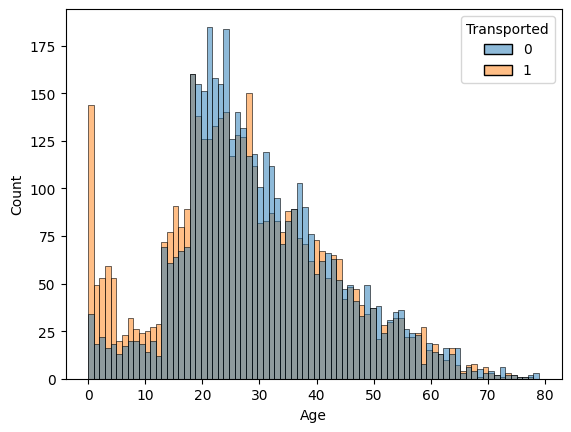

In [ ]:
sns.histplot(x=df.Age, bins=80, hue=df.Transported);

## idade das pessoas tranportadas com relação ao Destination

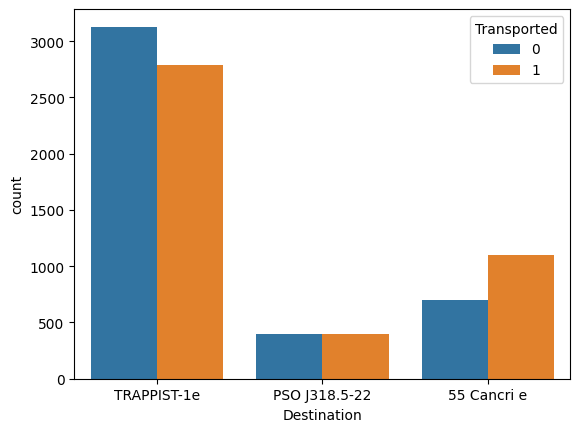

In [ ]:
sns.countplot(x=df.Destination, hue=df.Transported);

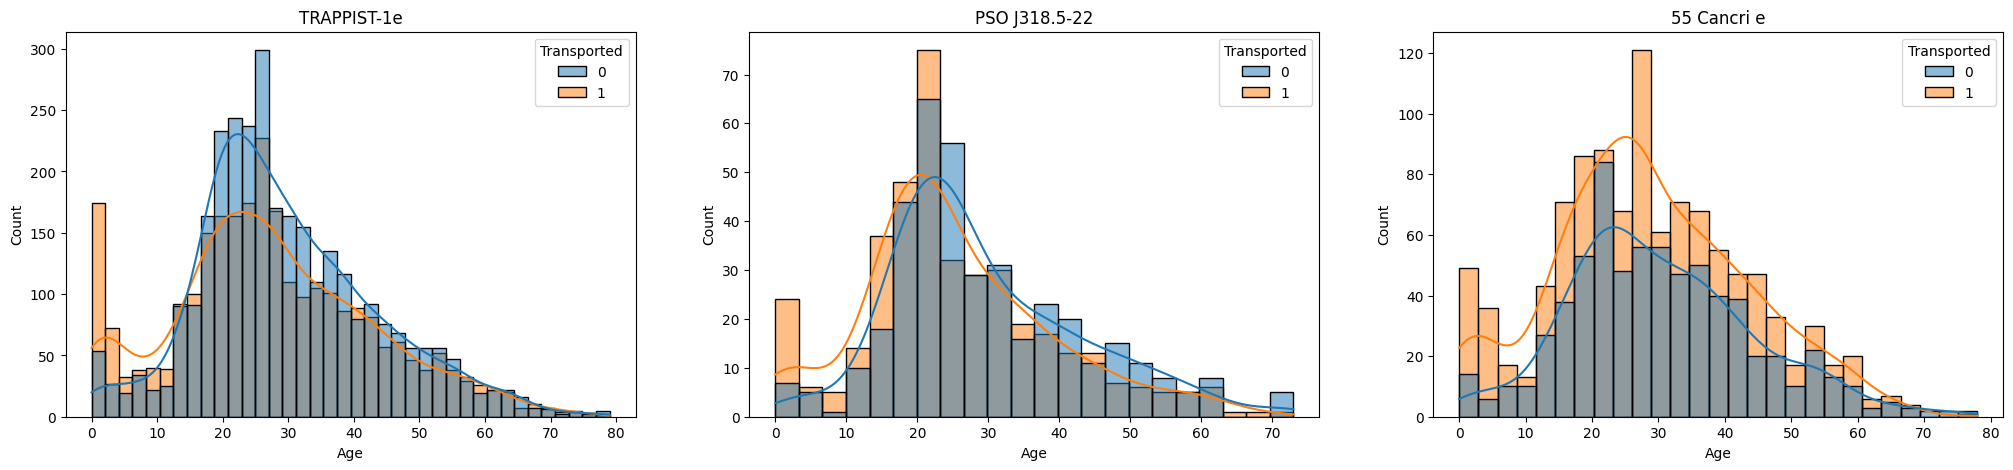

In [ ]:
# trasportado de acordo com a idade e planeta de destino
fig, (x1, x2, x3) = plt.subplots(1, 3, figsize=(25, 5))
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['Destination'] == 'TRAPPIST-1e'], ax=x1);
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['Destination'] == 'PSO J318.5-22'], ax=x2);
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['Destination'] == '55 Cancri e'], ax=x3);
x1.set_title('TRAPPIST-1e')
x2.set_title('PSO J318.5-22')
x3.set_title('55 Cancri e')
plt.show();

# idade das pessoas tranportadas com relação ao HomePlanet

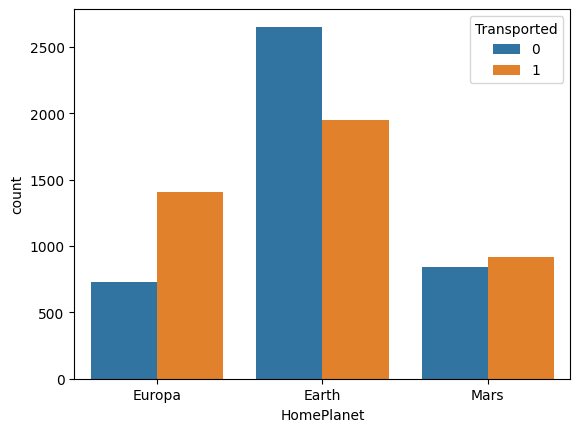

In [ ]:
sns.countplot(x=df.HomePlanet, hue=df.Transported);

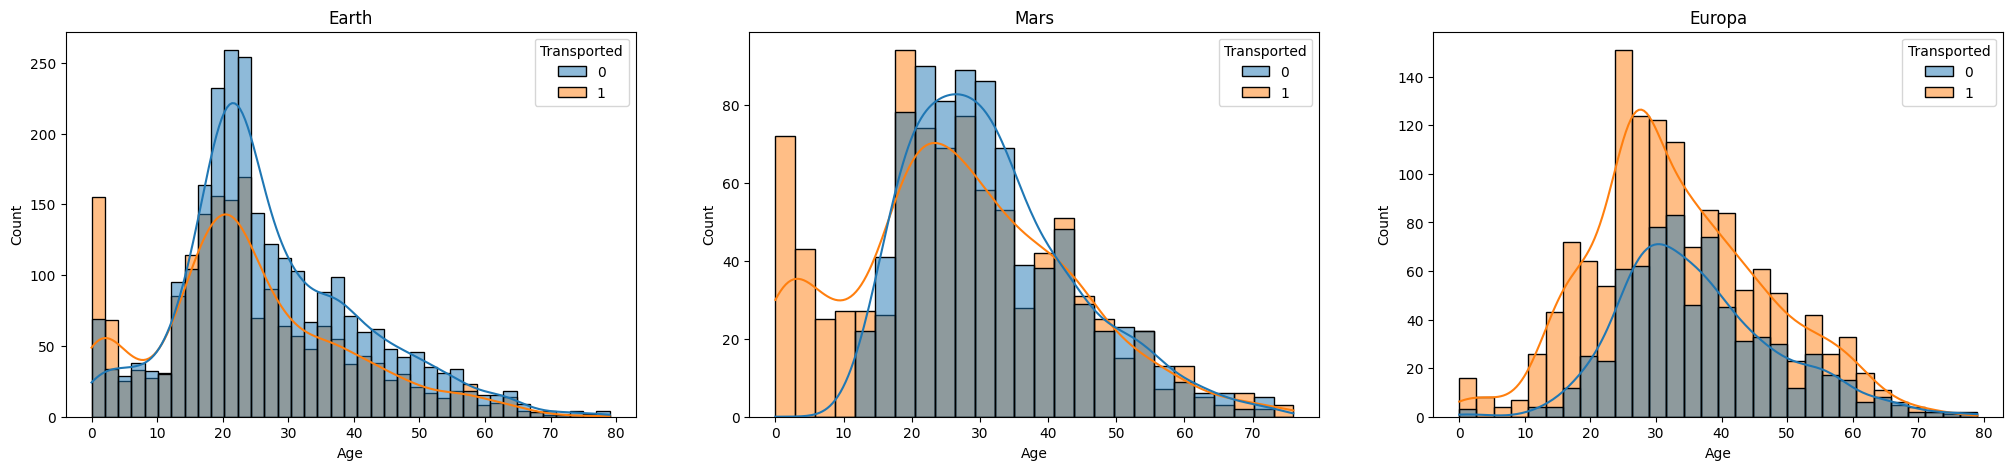

In [ ]:
# trasportado de acordo com a idade e planeta de origem
fig, (x1, x2, x3) = plt.subplots(1, 3, figsize=(25, 5))
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['HomePlanet'] == 'Earth'], ax=x1);
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['HomePlanet'] == 'Mars'], ax=x2);
sns.histplot(x='Age', hue='Transported', kde=True, data=df[df['HomePlanet'] == 'Europa'], ax=x3);
x1.set_title('Earth')
x2.set_title('Mars')
x3.set_title('Europa')
plt.show();

51% de pessoas de Earth com menor de 20 anos foram transportadas (1413)

70% de pessoas de Mars com menor de 20 anos foi transportadas (403)

86% de pessoas de Europa com menor de 20 anos foi transportadas (234)

### calculos para achar as porcentagens acima

In [ ]:
def calculo_porcentagem_planeta_idade(planeta :str, idade :int):
  transportado, nao_transportado = df[(df['HomePlanet'] == planeta) & (df['Age'] < idade)].Transported.value_counts()

  return round(transportado / (transportado + nao_transportado), 4) * 100

In [ ]:
print('Earth: ', calculo_porcentagem_planeta_idade('Earth', 20))
print('Mars: ', calculo_porcentagem_planeta_idade('Mars', 20))
print('Europe: ', calculo_porcentagem_planeta_idade('Europa', 20))

Earth:  51.66
Mars:  70.72
Europe:  85.9


# gasto em serviços da população do HomePlanet

In [ ]:
servicos = df.columns[7:12]
servicos

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

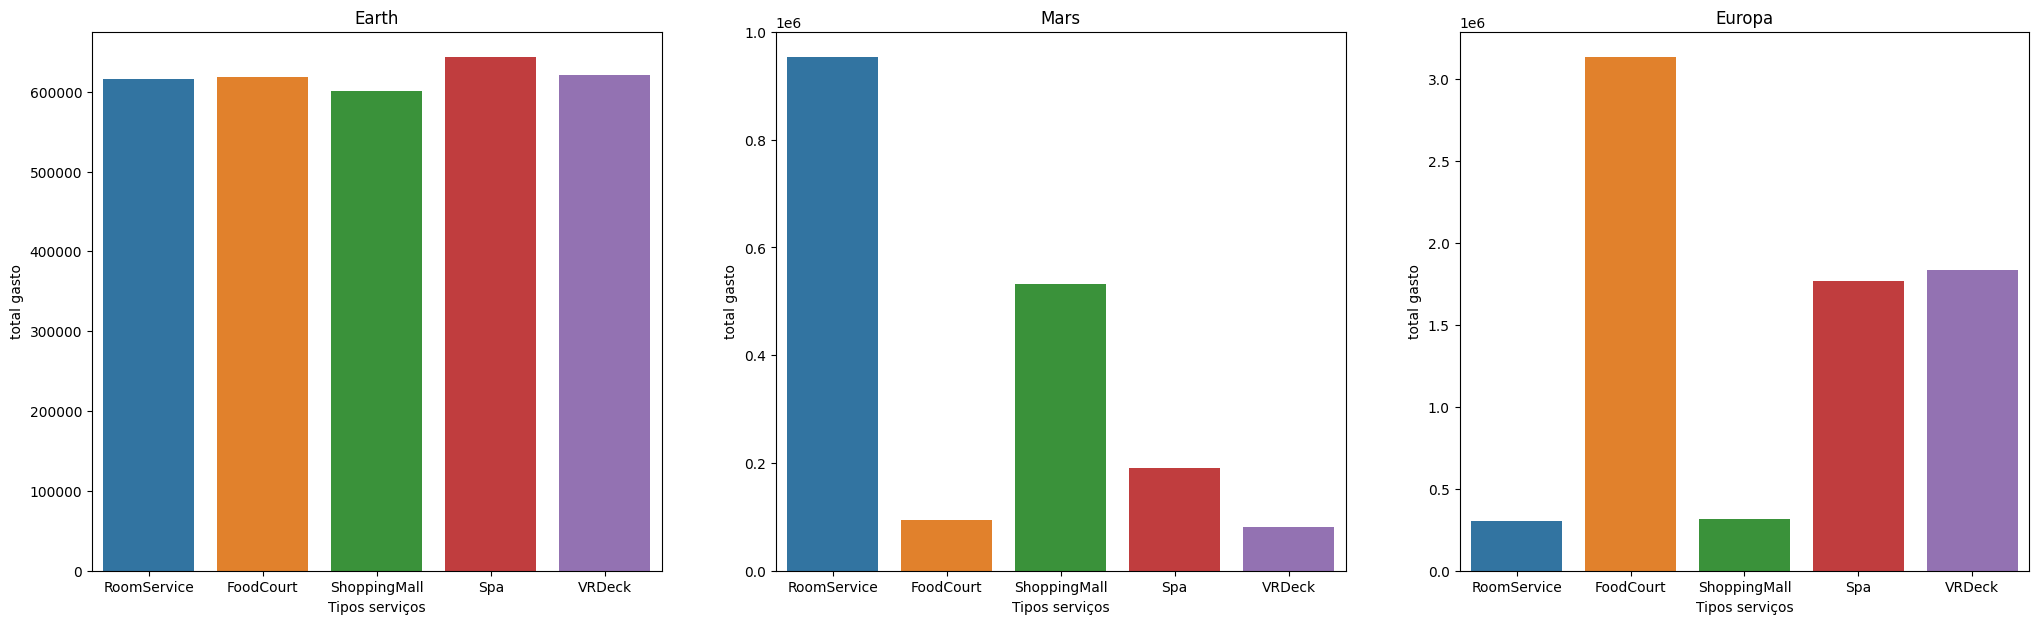

In [ ]:
fig, (x1, x2, x3) = plt.subplots(1, 3, figsize=(25, 7))

earth = pd.DataFrame(df[df['HomePlanet'] == 'Earth'].loc[:, servicos].sum()).reset_index()
mars = pd.DataFrame(df[df['HomePlanet'] == 'Mars'].loc[:, servicos].sum()).reset_index()
europa = pd.DataFrame(df[df['HomePlanet'] == 'Europa'].loc[:, servicos].sum()).reset_index()

sns.barplot(x='index', y=0, data=earth, ax=x1);
sns.barplot(x='index', y=0, data=mars, ax=x2);
sns.barplot(x='index', y=0, data=europa, ax=x3);

x1.set_title('Earth')
x2.set_title('Mars')
x3.set_title('Europa')

x1.set_ylabel('total gasto')
x2.set_ylabel('total gasto')
x3.set_ylabel('total gasto')

x1.set_xlabel('Tipos serviços')
x2.set_xlabel('Tipos serviços')
x3.set_xlabel('Tipos serviços')

plt.show();

 pessoas de Earth possuem gastos mais distribuídos

 pessoas de Mars gastam mais com roomService e ShoppingMall

 pessoas de Europa gastam mais com FoodCourt

In [ ]:
europa_gasto_servico = pd.DataFrame(df[df['HomePlanet'] == 'Europa'].loc[:, servicos].sum()).sum()
earth_gasto_servico = pd.DataFrame(df[df['HomePlanet'] == 'Earth'].loc[:, servicos].sum()).sum()
mars_gasto_servico = pd.DataFrame(df[df['HomePlanet'] == 'Mars'].loc[:, servicos].sum()).sum()

print('Europa: ', europa_gasto_servico[0])
print('Earth: ', earth_gasto_servico[0])
print('Mars: ', mars_gasto_servico[0])

Europa:  7355412.0
Earth:  3098699.0
Mars:  1849161.0


ordem dos planetas que mais gastam
  - Europa > Earth > Mars

# correlação

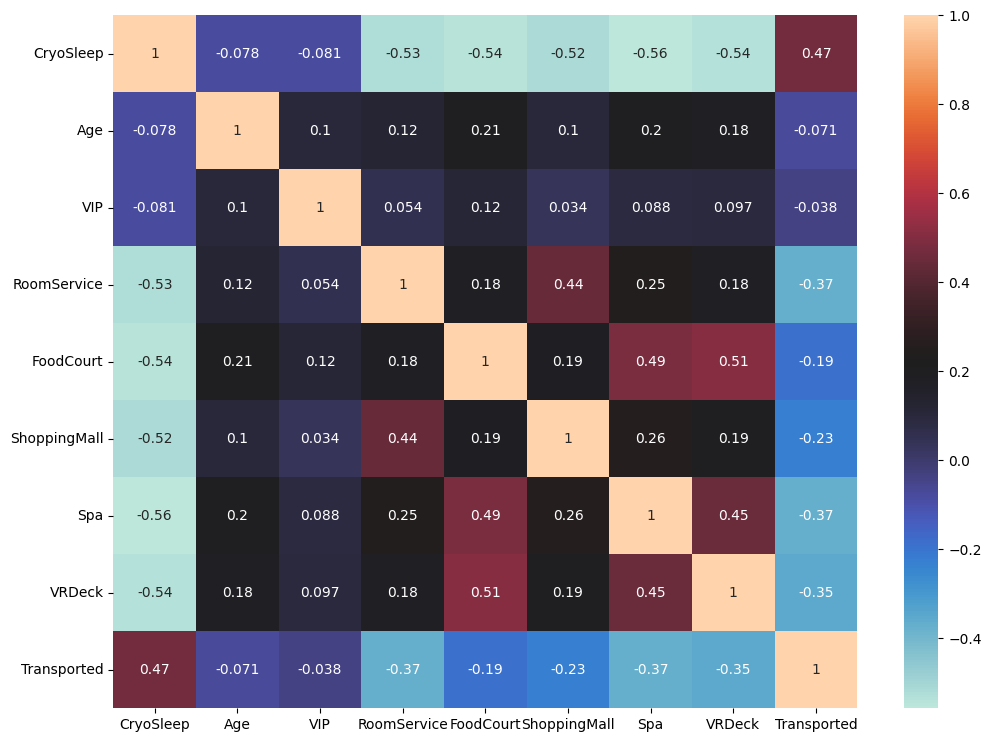

In [ ]:
# pearson, spearman, kendall
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot=True, cmap='icefire');

## aumentar correlação

In [ ]:
# agrupando essas colunas, tiramos os NaNs e aumentamos um pouco a correlação
df['servicos'] = df.loc[:, ['RoomService', 'Spa', 'VRDeck']].sum(axis=1)
df['compras'] = df.loc[:, ['FoodCourt', 'ShoppingMall']].sum(axis=1)

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
servicos          0
compras           0
dtype: int64

In [ ]:
df.drop(columns={'RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall'}, inplace = True)

In [ ]:
df['servicos'].median(), df['compras'].median()

(59.0, 1.0)

In [ ]:
df.describe()

,CryoSleep,Age,VIP,Transported,servicos,compras
count,8476.000000,8514.000000,8490.000000,8693.000000,8693.000000,8693.000000
mean,0.358306,28.827930,0.023439,0.503624,822.860002,618.006327
std,0.479531,14.489021,0.151303,0.500016,1830.912512,1696.461254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,1.000000,59.000000,1.000000
75%,1.000000,38.000000,0.000000,1.000000,848.000000,600.000000
max,1.000000,79.000000,1.000000,1.000000,28600.000000,29813.000000


# boxplot

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,servicos,compras
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0,0.0,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,1,702.0,34.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,0,6807.0,3576.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,0,3522.0,1654.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1,870.0,221.0


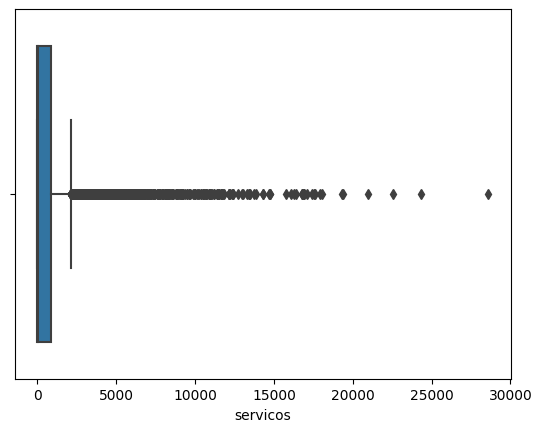

In [ ]:
# os valores são muito dispersos
sns.boxplot(x=df.servicos);

# passageiros que estavam na mesma cabine

PassengerId
- gggg id do grupo
- pp id dentro do grupo

as pessoas podem estar no mesmo grupo, mas ficar em quartos separados

estar no mesmo quarto tem relação com ser transportado? Provavelmente quem divide o quarto costuma andar junto na viagem

**Conclusão:**
  -
  - as pessoas que dividem a mesma cabine não necessariamente são transpordatas juntas



**O que precisa ser analisado**:
  - talvez ver que parte da nave houve mais trasnportes. Talvez tenha algo a ver com a localização das pessoas na nave
  - ver pessoas transportadas no cryogenio



In [ ]:
df['pessoas_por_cabine'] = df.groupby('Cabin').PassengerId.transform('count')

In [ ]:
# chance de estar na mesma cabine e ser transportado
df['chance_ser_transportada'] = df.groupby('Cabin').Transported.transform('mean')
df['chance_ser_transportada'] = df['chance_ser_transportada'].round(2)

In [ ]:
df['chance_ser_transportada']

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.5
8692    0.5
Name: chance_ser_transportada, Length: 8693, dtype: float64

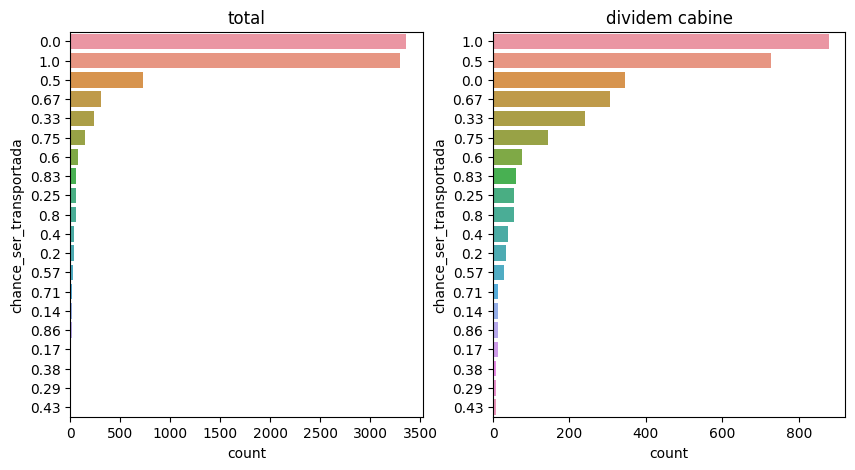

In [ ]:
# o primeiro gráfico mostra a chance de uma pessoa ser transportada
# o segundo gráfico mostra a chance de pessoas que dividem a mesma cabine serem todas transportadas

fig, (x1, x2) = plt.subplots(1, 2, figsize=(10, 5))

ordem_total = df['chance_ser_transportada'].value_counts().index
ordem_dividem_cabine = df[df['pessoas_por_cabine'] > 1]['chance_ser_transportada'].value_counts().index

sns.countplot(y='chance_ser_transportada', data=df, order=ordem_total, ax=x1);
sns.countplot(y='chance_ser_transportada', data=df[df['pessoas_por_cabine'] > 1], order=ordem_dividem_cabine, ax=x2);

x1.set_title('total')
x2.set_title('dividem cabine')

plt.show();

# que parte da nave houve mais transportes?

não consegui descobrir um lado ou um convés que tenha mais transportes. Talvez tenha algo com o número da cabine

a maior parte das pessoas vindo da terra estão no convés G, F e E
da Europa, B, C, A, D, E
de mars F, E, D


O pessoal da europa ficou hospedado nas primeiras 300 cabines. Será que isso influenciou em eles serem transportados?
O pessoal dos outros planetas que ficaram hospedados nessa cabine não tiveram uma taxa mais alta de transporte nessas primeiras cabines

Cabin - O número da cabine onde o passageiro está hospedado. Assume a forma convés/num/lado, onde o lado pode ser P para bombordo ou S para estibordo.

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,servicos,compras,pessoas_por_cabine,chance_ser_transportada
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0,0.0,0.0,1.0,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,1,702.0,34.0,1.0,1.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,0,6807.0,3576.0,2.0,0.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,0,3522.0,1654.0,2.0,0.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1,870.0,221.0,1.0,1.0


In [ ]:
df[['conves', 'numero_quarto', 'lado']] = df.Cabin.str.split('/', expand=True)

In [ ]:
df.numero_quarto = df.numero_quarto.astype(float)

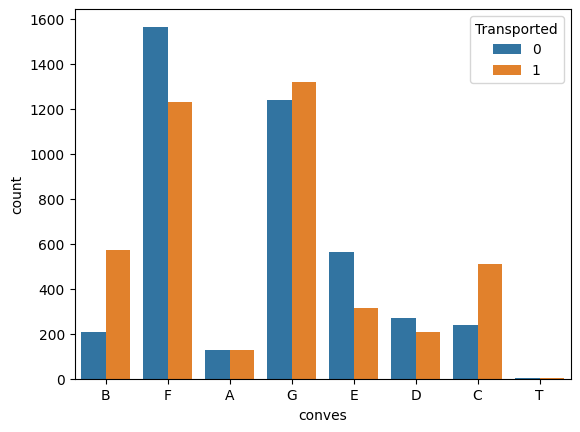

In [ ]:
sns.countplot(x='conves', hue='Transported', data=df);

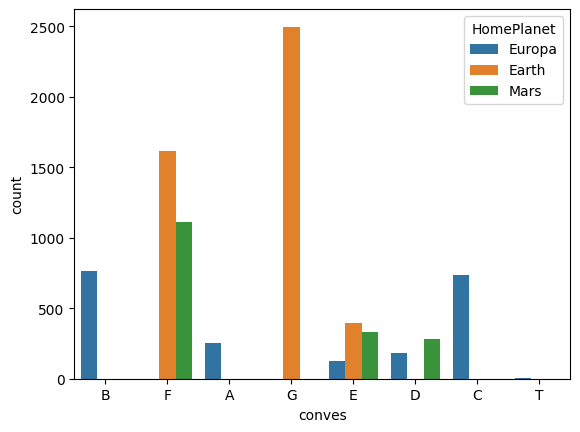

In [ ]:
sns.countplot(x='conves', hue='HomePlanet', data=df);

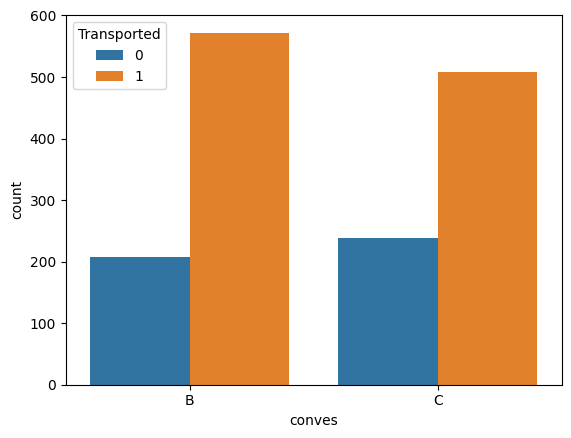

In [ ]:
sns.countplot(x='conves', hue='Transported', data=df[df['conves'].isin(['B', 'C'])]);

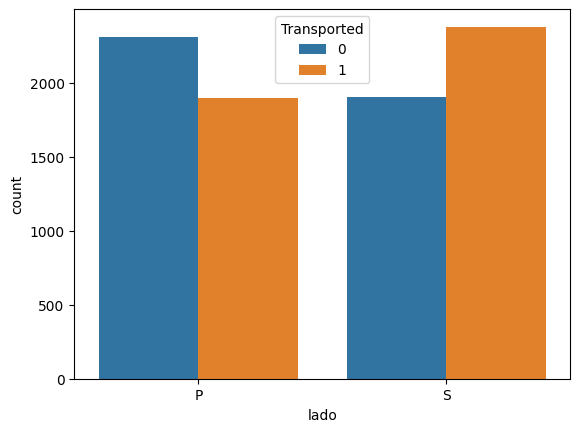

In [ ]:
sns.countplot(x='lado', hue='Transported', data=df);

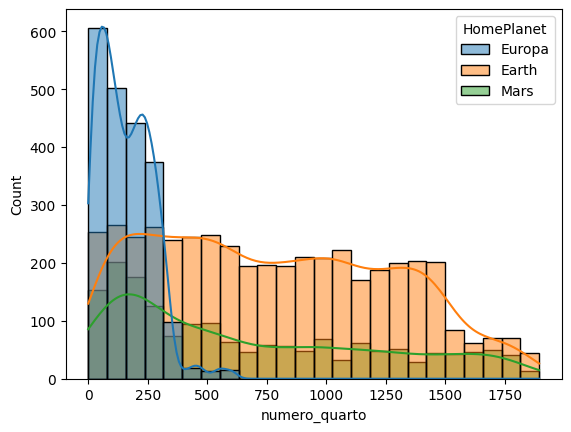

In [ ]:
# Europa está nas primeriras cabines, por isso eles foram muito transportados?
sns.histplot(x='numero_quarto', hue='HomePlanet', kde=True, data=df);

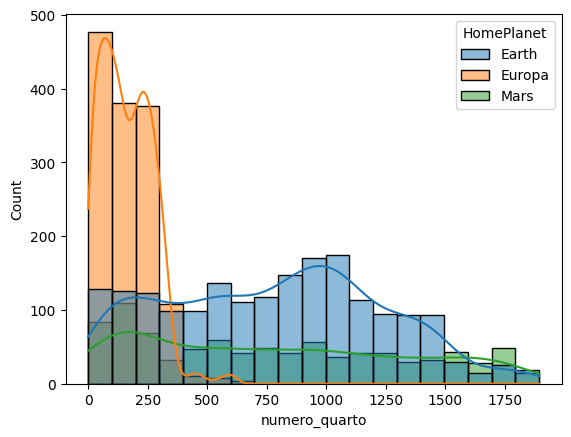

In [ ]:
# os outros planetas não tiveram uma taxa de transporte maior nas primeiras cabines
# provavelmente não é esse o motivo de o pessoal da europa ser transportado
sns.histplot(x='numero_quarto', hue='HomePlanet', kde=True, data=df[df['Transported'] == 1]);

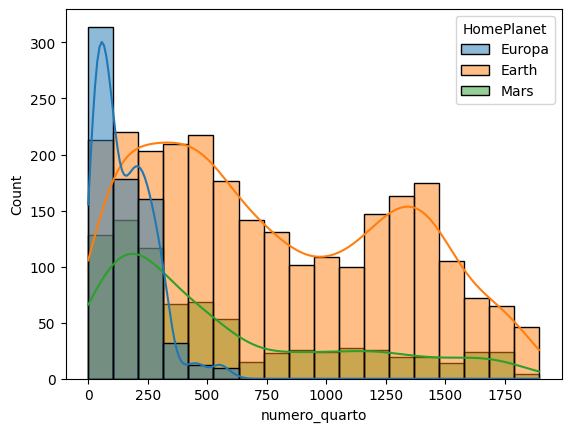

In [ ]:
sns.histplot(x='numero_quarto', hue='HomePlanet', kde=True, data=df[df['Transported'] == 0]);

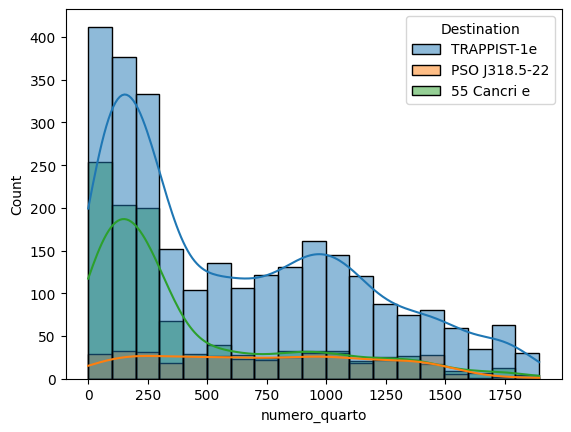

In [ ]:
sns.histplot(x='numero_quarto', hue='Destination', kde=True, data=df[df['Transported'] == 1]);

## algum lado foi mais transportado?

In [ ]:
# não há um lado onde tenha mais pessoas em grupo ou mais pessoas sozinha que foram transportadas, está balanceado
df[df['pessoas_por_cabine'] == 1]['lado'].value_counts(), df[df['pessoas_por_cabine'] > 1]['lado'].value_counts()

(P    2748
 S    2679
 Name: lado, dtype: int64,
 S    1609
 P    1458
 Name: lado, dtype: int64)

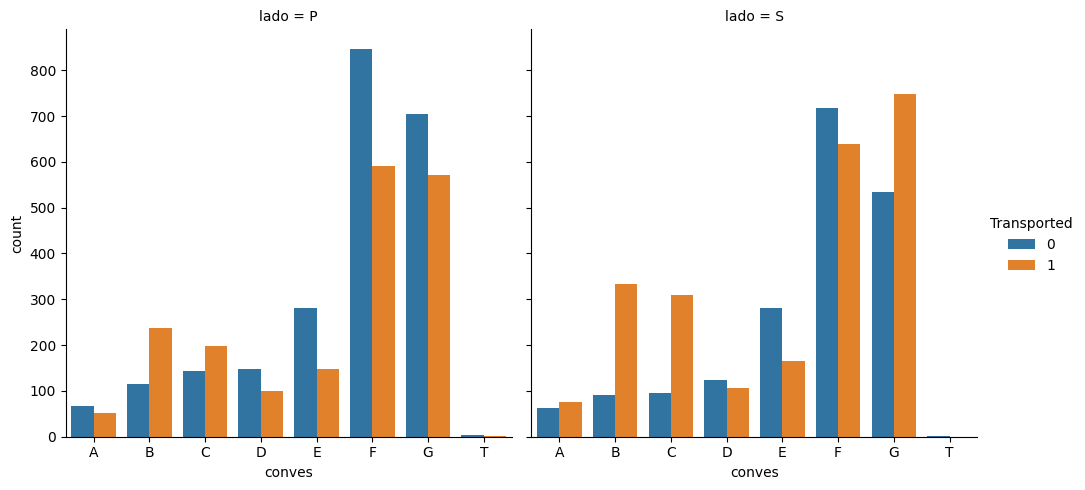

In [ ]:
lado_transportado = df.groupby(['conves', 'lado']).Transported.value_counts()

lado_transportado = lado_transportado.to_frame(name='count').reset_index()

sns.catplot(data=lado_transportado, x='conves', y='count', hue='Transported', col='lado', kind='bar');

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,servicos,compras,pessoas_por_cabine,chance_ser_transportada,conves,numero_quarto,lado
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0,0.0,0.0,1.0,0.0,B,0.0,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,1,702.0,34.0,1.0,1.0,F,0.0,S
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,0,6807.0,3576.0,2.0,0.0,A,0.0,S
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,0,3522.0,1654.0,2.0,0.0,A,0.0,S
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1,870.0,221.0,1.0,1.0,F,1.0,S


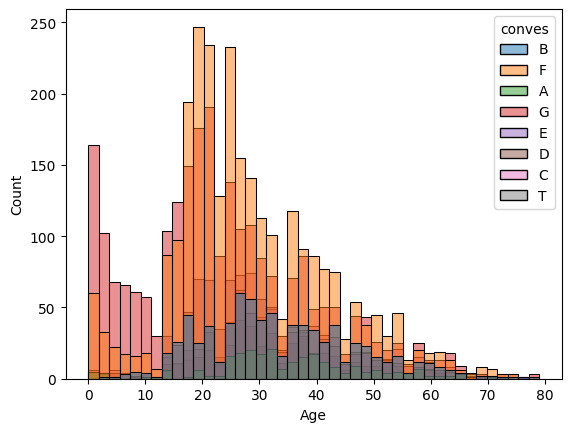

In [ ]:
sns.histplot(x='Age', hue='conves', data=df);

# CryoSleep
grande chance de uma pessoa no criogênio ser transportada, isso já foi mostrado na correlação

a maioria das crianças estavam em CryoSleep, isso explica porque a maioria delas foi transportada

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,servicos,compras,pessoas_por_cabine,chance_ser_transportada,conves,numero_quarto,lado
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0,0.0,0.0,1.0,0.0,B,0.0,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,1,702.0,34.0,1.0,1.0,F,0.0,S
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,0,6807.0,3576.0,2.0,0.0,A,0.0,S
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,0,3522.0,1654.0,2.0,0.0,A,0.0,S
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1,870.0,221.0,1.0,1.0,F,1.0,S


In [ ]:
df.CryoSleep.value_counts()

0.0    5439
1.0    3037
Name: CryoSleep, dtype: int64

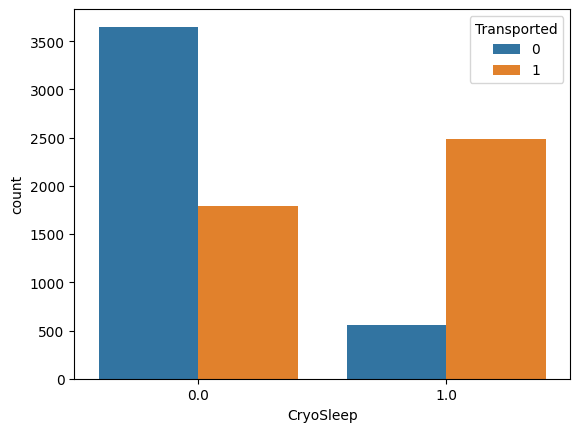

In [ ]:
sns.countplot(x='CryoSleep', hue='Transported', data=df);

[]

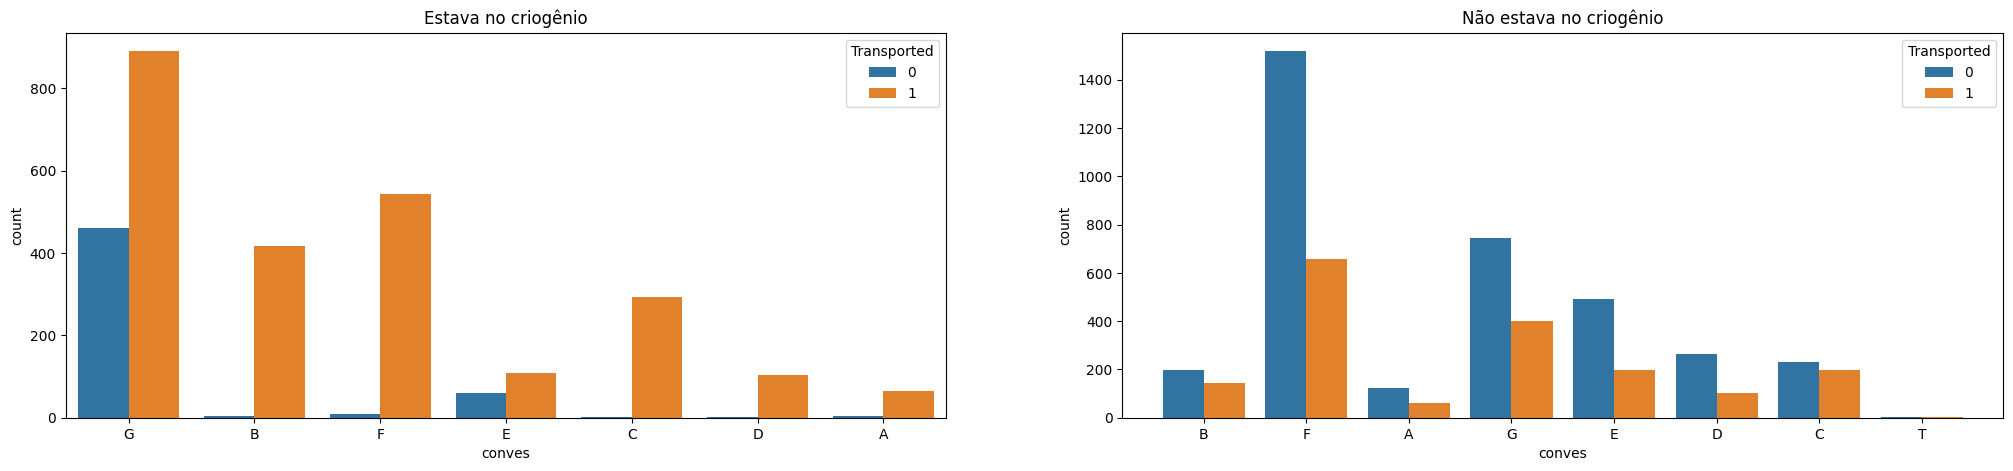

In [ ]:
fig, (x1, x2) = plt.subplots(1, 2, figsize=(25, 5))

sns.countplot(x='conves', hue='Transported', data=df[df.CryoSleep == 1], ax=x1);
sns.countplot(x='conves', hue='Transported', data=df[df.CryoSleep == 0], ax=x2);

x1.set_title('Estava no criogênio')
x2.set_title('Não estava no criogênio')

plt.plot()

[]

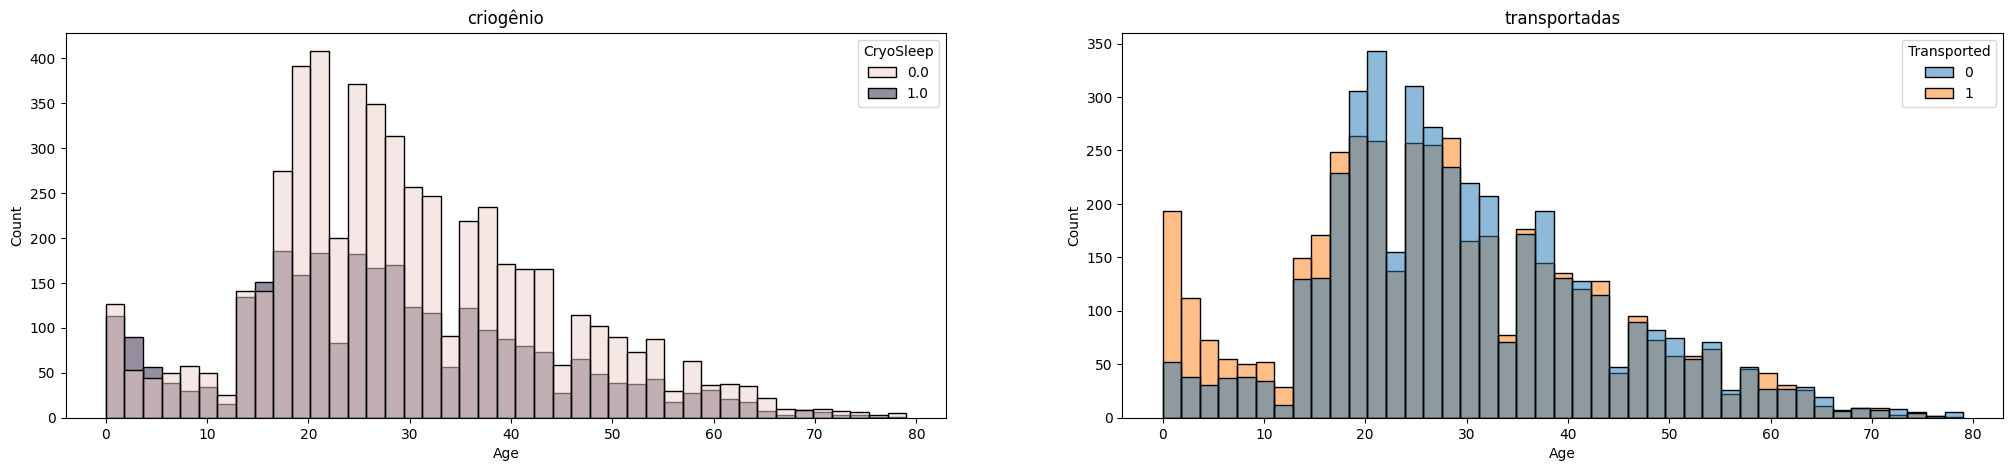

In [ ]:
# está bem distribuido quem está no criogênio
# as crianças foram muito transportadas, provavelmente porque quase todas estavam no criogênio
fig, (x1, x2) = plt.subplots(1, 2, figsize=(25, 5))

sns.histplot(x='Age', hue='CryoSleep', data=df, ax=x1);
sns.histplot(x='Age', hue='Transported', data=df, ax=x2);

x1.set_title('criogênio')
x2.set_title('transportadas')

plt.plot()

# VIP

In [ ]:
# quase ninguém, não vale a pena usar o VIP
df.VIP.value_counts()

0.0    8291
1.0     199
Name: VIP, dtype: int64

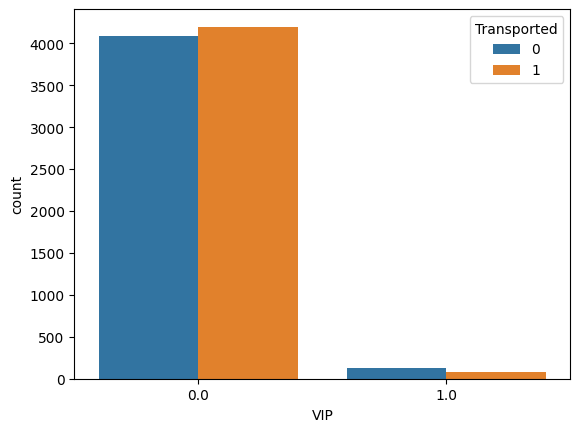

In [ ]:
sns.countplot(x='VIP', hue='Transported', data=df);

# anotações





## planeta de origem

Marte:
  -  a metade foi para outra dimensão e metade não

Europa:
  -  uma maior parte foi para outra dimensão

Terra:
  - uma maior parte não foi para outra dimensão
  


O que diferencia a população desses três planetas?
  - dinheiro?
    - europa, earth, mars
    - o pessoal da europa foi mais transportado
      - lugar que eles se hospedam?
  - onde estavam?
  - destino?


## planeta de destino

TRAPPIST-1e:
  - uma maior parte não foi transportada

PSO J318.5-22:
  - metade foi para outra dimensão, metade não

55 Cancri e:
  - uma maior parte foi transportada


qual é a relação do país de origem com o país de destino?

# preparando para o modelo

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,Transported,servicos,compras,conves,pp,gggg
0,0,0.0,0,39.0,0,0.0,0.0,0,1,1
1,1,0.0,0,24.0,1,702.0,34.0,1,1,2
2,0,0.0,0,58.0,0,6807.0,3576.0,2,1,3
3,0,0.0,0,33.0,0,3522.0,1654.0,2,2,3
4,1,0.0,0,16.0,1,870.0,221.0,1,1,4


In [ ]:
df['pp'] = df.PassengerId.str[-2:].astype(int)

In [ ]:
df['gggg'] = df.PassengerId.str[:4].astype(int)

In [ ]:
df.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                        179
VIP                        203
Name                       200
Transported                  0
servicos                     0
compras                      0
pessoas_por_cabine         199
chance_ser_transportada    199
conves                     199
numero_quarto              199
lado                       199
pp                           0
gggg                         0
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.drop(columns=['PassengerId', 'Name', 'VIP', 'Cabin', 'pessoas_por_cabine', 'lado', 'numero_quarto', 'chance_ser_transportada'], inplace=True)

In [ ]:
df['conves'], _ = pd.factorize(df['conves'])
df['HomePlanet'], _ = pd.factorize(df['HomePlanet'])
df['Destination'], _ = pd.factorize(df['Destination'])

In [ ]:
df.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
Transported    0
servicos       0
compras        0
conves         0
pp             0
gggg           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CryoSleep                8693 non-null   float64
 1   servicos                 8693 non-null   float64
 2   compras                  8693 non-null   float64
 3   pessoas_por_cabine       8693 non-null   float64
 4   chance_ser_transportada  8693 non-null   float64
 5   conves                   8693 non-null   int64  
 6   numero_quarto            8693 non-null   float64
 7   lado                     8693 non-null   object 
 8   pp                       8693 non-null   int64  
 9   gggg                     8693 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 679.3+ KB


# treinamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y = df.pop('Transported')
x = df.copy()

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_treino.shape, x_teste.shape

((6954, 9), (1739, 9))

In [ ]:
y_treino.shape, y_teste.shape

((6954,), (1739,))

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_treino, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.score(x_treino, y_treino)

1.0

In [ ]:
rf_model.score(x_teste, y_teste)

0.7814836112708453

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Supondo que você já tenha seus dados de treinamento e labels (X_train e y_train)
# E seu modelo Random Forest já esteja treinado:

# Crie o modelo de Random Forest
rf_model = RandomForestClassifier()

# Treine o modelo nos dados
rf_model.fit(x_treino, y_treino)

# Obtenha as importâncias das features
importances = rf_model.feature_importances_

# Crie um array com os nomes das features (caso você queira rotular o gráfico)
feature_names = np.array(x_treino.columns) # Substitua os nomes reais das features


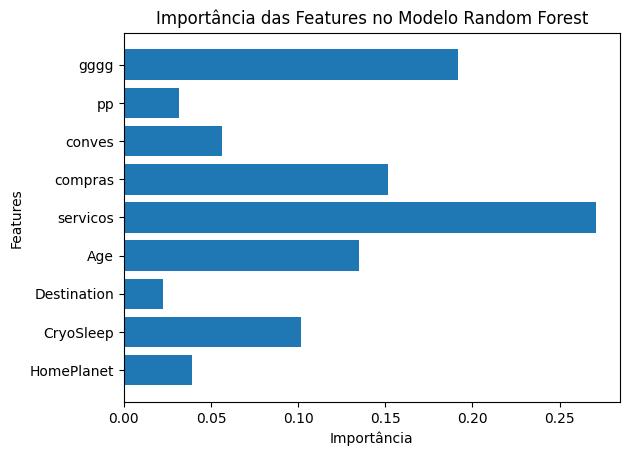

In [ ]:
# Crie o gráfico de barras
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo Random Forest')
plt.show()